# English Premier League Data Analysis

In this mini-project I want to find out how football changed over the last 100 years in England. Particularly, I am interested in performance of top teams and various trends. For this project I will using data from [Football data for England (and Wales)](https://github.com/footballcsv/eng-england)


The dataset has five columns: Season, Date, Team 1, Team 2, FT (full time score) and HT (half time score).

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

### Download and save the data
First, I will download CSV files for Premier league (Division One) games for the last 114 years from the repo, and save it to a dataframe.

In [87]:
decade_list = ['1900s','1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s']
year_list = range (0, 10 ,1)
war_years = ['1915-16','1916-17','1917-18','1918-19','1940-41','1941-42','1942-43','1943-44','1944-45','1945-46']

master_df = pd.DataFrame()
master_list_ = [] 

for decade in decade_list:
    
    decade_df = pd.DataFrame()
    list_ = [] 
    
    for year in year_list:
            
        premierleague_decades = ['2000s','2010s']
        not_premierleague_years = [0,1]
        
        if decade == '1990s' and year not in not_premierleague_years:
            division_name = '1-premierleague.csv'
        
        elif decade in premierleague_decades:
            division_name = '1-premierleague.csv'
            
        else:
            division_name = '1-division1.csv'
        
        if year == 9:
            year = decade[0:3]+str(year)+'-'+str(int(decade[2:3])+1)+'0'
            if year == '1999-100':
                year = '1999-00'
        else:
            year = decade[0:3]+str(year)+'-'+decade[2:3]+str(year+1)
            if year == '2014-15':
                break
        
        if year in war_years:
            continue
        
        url = "https://raw.githubusercontent.com/footballcsv/eng-england/master/"+decade+"/"+year+"/"+division_name
        try:
            df = pd.read_csv(url)
            df['Season'] = year # some years do not have date column
            df = df[['Season','Date','Team 1','Team 2','FT','HT']]
            list_.append(df)
        except:
            print 'Error happened for year: '+ year
            continue
    decade_df = pd.concat(list_)
    master_list_.append(decade_df)
    
master_df = pd.concat(master_list_)

In [88]:
master_df.head()

,Season,Date,Team 1,Team 2,FT,HT
0,1900-01,-,Blackburn Rovers,Aston Villa,2-2,-
1,1900-01,-,Bolton Wanderers,Aston Villa,1-0,-
2,1900-01,-,Bury,Aston Villa,3-1,-
3,1900-01,-,Derby County,Aston Villa,3-0,-
4,1900-01,-,Everton,Aston Villa,2-1,-


### Question 1: Are teams have been scoring more goals in recent years? 

To answer to this question I will split FT column into two columns, convert them to integer values and add them to each other to find the average number of goals per game. 

In [110]:
split_FT = lambda x: pd.Series([i for i in reversed(x.split('-'))])
FTs = master_df['FT'].apply(split_FT) # splitting the FT column
master_df['FT1'] = FTs[0] # adding to the main dataframe
master_df['FT2'] = FTs[1]

In [116]:
master_df['FT1'] = master_df['FT1'].astype('int') # converting to integer values
master_df['FT2'] = master_df['FT2'].astype('int')

In [131]:
master_df['TotalG'] = master_df['FT1'] + master_df['FT2'] 
master_df.head() 

,Season,Date,Team 1,Team 2,FT,HT,FT1,FT2,TotalG
0,1900-01,-,Blackburn Rovers,Aston Villa,2-2,-,2,2,4
1,1900-01,-,Bolton Wanderers,Aston Villa,1-0,-,0,1,1
2,1900-01,-,Bury,Aston Villa,3-1,-,1,3,4
3,1900-01,-,Derby County,Aston Villa,3-0,-,0,3,3
4,1900-01,-,Everton,Aston Villa,2-1,-,1,2,3


In [141]:
group_season = master_df.groupby('Season')
mean_TotalG = group_season['TotalG'].mean()

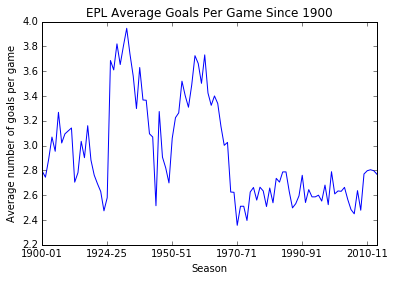

In [145]:
linechart = mean_TotalG.plot()
linechart.set_title("EPL Average Goals Per Game Since 1900")
linechart.set_ylabel('Average number of goals per game')

### Answer to the first question: No.
As you can see from the line chart the average number of goals per game in 30s and 60s was almost four. Now it's only around 2.8 goals per game.

The two high averages may be related to the World Wars. It needs further research.

### To be continued... 